### LSTM para clasificación de texto

El uso de LSTM (Long Short-Term Memory) para la clasificación de texto y análisis de sentimientos es una aplicación popular en el campo del procesamiento del lenguaje natural (NLP). Aquí hay un resumen de cómo se utiliza LSTM en este contexto:

1. **Preprocesamiento de texto**: Antes de alimentar el texto a un modelo LSTM, es necesario realizar tareas de preprocesamiento como tokenización, eliminación de stop words, y lematización o derivación para estandarizar y limpiar los datos.

2. **Representación del texto**: El texto se convierte en vectores numéricos que pueden ser entendidos por el modelo LSTM. Esto puede hacerse utilizando técnicas como el one-hot encoding, word embeddings (como Word2Vec o GloVe), o técnicas más avanzadas como el uso de modelos de lenguaje pre-entrenados como BERT o GPT.

3. **Construcción del modelo LSTM**: Se crea un modelo LSTM que toma como entrada la representación numérica del texto. El modelo LSTM se entrena utilizando un conjunto de datos etiquetados para aprender a clasificar el texto en diferentes categorías o para realizar análisis de sentimientos.

4. **Entrenamiento del modelo**: Durante el entrenamiento, el modelo LSTM ajusta los pesos de sus conexiones internas para minimizar una función de pérdida, como la entropía cruzada, en función de los datos de entrenamiento. Esto implica propagar hacia atrás el error a través del tiempo utilizando el algoritmo de retropropagación a lo largo de las diferentes etapas temporales de la secuencia de texto.

5. **Evaluación del modelo**: Una vez entrenado, el modelo LSTM se evalúa utilizando un conjunto de datos de prueba para medir su desempeño en la clasificación de texto o en el análisis de sentimientos. Las métricas comunes de evaluación incluyen la precisión, la recuperación, la puntuación F1 y la matriz de confusión.

6. **Predicción y despliegue**: Una vez que el modelo ha sido entrenado y evaluado, puede ser utilizado para realizar predicciones en nuevos datos de texto y desplegado en producción para automatizar tareas de clasificación de texto o análisis de sentimientos en tiempo real.

El uso de LSTM para la clasificación de texto y análisis de sentimientos implica la construcción y entrenamiento de modelos LSTM que pueden aprender a comprender y clasificar el texto en diferentes categorías o para evaluar la polaridad de los sentimientos expresados en el texto.

In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/ml-online/main/data/IMDB_Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Preprocesamiento

El preprocesamiento de eliminación de caracteres no alfanuméricos y conversión a minúsculas es una parte importante del procesamiento de texto antes de alimentar los datos a un modelo LSTM u otro modelo de procesamiento del lenguaje natural (NLP). Aquí está el detalle de este proceso:

1. **Eliminación de caracteres no alfanuméricos**: Este paso implica eliminar todos los caracteres que no son letras o números del texto. Estos caracteres pueden incluir signos de puntuación, símbolos especiales, caracteres de control, etc. La eliminación de estos caracteres ayuda a limpiar el texto y a reducir la complejidad, lo que facilita el procesamiento posterior.

2. **Conversión a minúsculas**: Después de eliminar los caracteres no alfanuméricos, el texto se convierte completamente a minúsculas. Esto es importante para estandarizar el texto y evitar que el modelo LSTM considere las mismas palabras con diferentes casos como distintas, lo que podría reducir la efectividad del modelo.

3. **Ejemplo práctico**:

   Supongamos que tenemos el siguiente texto de ejemplo:
   ```
   "¡Hola! Este es un ejemplo de texto con signos de puntuación, números (123), y símbolos especiales."
   ```

   Después del preprocesamiento de eliminación de caracteres no alfanuméricos y conversión a minúsculas, el texto se vería así:
   ```
   "hola este es un ejemplo de texto con signos de puntuacion numeros 123 y simbolos especiales"
   ```

   Como puedes ver, se eliminaron todos los caracteres no alfanuméricos y el texto se convirtió a minúsculas.

Este proceso de preprocesamiento es fundamental para limpiar y estandarizar el texto antes de utilizarlo en modelos de procesamiento del lenguaje natural como LSTM, lo que ayuda a mejorar la calidad de las predicciones y la eficacia del modelo.

In [ ]:
def remove_html_markup(s):
    tag = False
    quote = False
    out = ""
    for c in s:
            if c == '<' and not quote:
                tag = True
            elif c == '>' and not quote:
                tag = False
            elif (c == '"' or c == "'") and tag:
                quote = not quote
            elif not tag:
                out = out + c
    return out

def remove_tags(text):
    result = remove_html_markup(text)  #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub(r'\W+', ' ', result)  #remove non-alphanumeric characters
    result = result.lower()
    return result

data['review'] = data['review'].apply(lambda cw : remove_tags(cw))
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive


In [ ]:
data['review'][1]

'a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done '

### Stop words

La eliminación de stop words es otro paso importante en el preprocesamiento de texto antes de alimentar los datos a un modelo LSTM u otro modelo de procesamiento del lenguaje natural (NLP). Las stop words son palabras comunes que tienen poco o ningún significado en la comprensión del texto y que generalmente se eliminan porque no aportan información relevante para el análisis. Aquí está el detalle de este proceso:

1. **Definición de stop words**: Las stop words son palabras que se consideran irrelevantes para el análisis de texto debido a su alta frecuencia de aparición en el lenguaje natural. Ejemplos comunes de stop words incluyen "el", "la", "de", "y", "a", "en", "con", entre otras.

2. **Identificación de stop words**: Antes de eliminar las stop words, es necesario tener una lista de palabras consideradas como stop words en el idioma del texto que se está procesando. Estas listas suelen estar disponibles en bibliotecas de procesamiento de texto en varios idiomas, como NLTK (Natural Language Toolkit) para Python.

3. **Eliminación de stop words**: Una vez que se ha identificado la lista de stop words, estas palabras se eliminan del texto durante el preprocesamiento. Esto se hace comparando cada palabra del texto con la lista de stop words y eliminando aquellas que coincidan. Es importante tener en cuenta que la eliminación de stop words puede afectar la coherencia y la semántica del texto, por lo que es importante evaluar el impacto de esta técnica en el contexto específico de cada aplicación.

4. **Ejemplo práctico**:

   Supongamos que tenemos el siguiente texto de ejemplo:
   ```
   "Este es un ejemplo de texto con palabras comunes como 'el', 'la', 'de', 'y', 'a', 'en', que pueden ser eliminadas como stop words."
   ```

   Después del preprocesamiento de eliminación de stop words, el texto se vería así:
   ```
   "Este ejemplo texto palabras comunes 'el', 'la', 'de', 'y', 'a', 'en', eliminadas stop words."
   ```

   Como puedes ver, las stop words como "es", "un", "con", "que", etc., han sido eliminadas del texto.

La eliminación de stop words es una técnica importante en el preprocesamiento de texto que ayuda a mejorar la calidad del análisis de texto y a reducir el ruido en los datos antes de alimentarlos a un modelo de procesamiento del lenguaje natural como LSTM.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


### Lematización

La lematización es un proceso lingüístico que consiste en reducir las palabras a su forma base o raíz, conocida como lema. A diferencia del stemming, que también busca reducir las palabras a su forma base, la lematización tiene en cuenta la morfología y el contexto gramatical de las palabras para obtener una forma más precisa y significativa.

En la lematización, las palabras se convierten a su forma canónica o de diccionario, lo que facilita su análisis y comprensión en tareas de procesamiento del lenguaje natural (NLP). Por ejemplo, las palabras "corriendo", "corre", "corrió" se lematizarían todas como "correr", ya que comparten la misma forma base.

La lematización puede ayudar a reducir la variabilidad de las palabras en un texto y mejorar la coherencia y precisión del análisis. Es especialmente útil en aplicaciones de NLP como la clasificación de texto, el análisis de sentimientos y la recuperación de información, donde la comprensión precisa del texto es fundamental.

En el preprocesamiento de texto antes de alimentar los datos a un modelo LSTM u otro modelo de NLP, la lematización a menudo se realiza junto con otras técnicas como la tokenización, la eliminación de stop words y la conversión a minúsculas para estandarizar y limpiar los datos de texto antes del análisis. Las bibliotecas de procesamiento de texto como NLTK (Natural Language Toolkit) en Python proporcionan funciones y herramientas para realizar la lematización de manera eficiente.

In [ ]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review'] = data.review.apply(lemmatize_text)
data['review'][1]

[nltk_data] Downloading package wordnet to /root/nltk_data...


'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done '

### Dataset

El dataset IMDb (Internet Movie Database) para análisis de reviews positivos y negativos es un conjunto de datos ampliamente utilizado en el campo del procesamiento del lenguaje natural (NLP) y el aprendizaje automático. Este conjunto de datos contiene críticas de películas recopiladas del sitio web IMDb, donde cada crítica está etiquetada como positiva o negativa según la opinión del crítico sobre la película.

Aquí hay una descripción general del dataset IMDb:

1. **Origen de los datos**: Las críticas de películas se recopilan del sitio web IMDb, que es una de las bases de datos más grandes y populares de películas en línea. IMDb permite a los usuarios escribir y publicar críticas de películas para compartir sus opiniones con otros usuarios.

2. **Contenido del dataset**: El dataset IMDb contiene un gran número de críticas de películas en texto sin procesar. Cada crítica está asociada con una etiqueta que indica si la opinión expresada en la crítica es positiva o negativa. Las etiquetas suelen ser binarias, donde "1" representa una crítica positiva y "0" representa una crítica negativa.

3. **Tamaño del dataset**: El tamaño del dataset puede variar, pero típicamente contiene decenas de miles o incluso cientos de miles de críticas de películas.

4. **Uso en el análisis de sentimientos**: El dataset IMDb es comúnmente utilizado para tareas de análisis de sentimientos, donde el objetivo es clasificar las críticas de películas como positivas o negativas basadas en su contenido textual. Esta tarea es un ejemplo de clasificación binaria en el procesamiento del lenguaje natural.

5. **Aplicaciones**: El dataset IMDb se utiliza en una variedad de aplicaciones, incluyendo la construcción y evaluación de modelos de aprendizaje automático para análisis de sentimientos, la investigación académica en el campo del procesamiento del lenguaje natural, y el desarrollo de sistemas de recomendación de películas basados en opiniones de usuarios.

El dataset IMDb es una importante fuente de datos para la investigación y el desarrollo de modelos de análisis de sentimientos en el campo del procesamiento del lenguaje natural, y ha sido fundamental en el avance de la comprensión computacional de las opiniones expresadas en texto en línea.

Text(0.5, 0, 'Frequency')

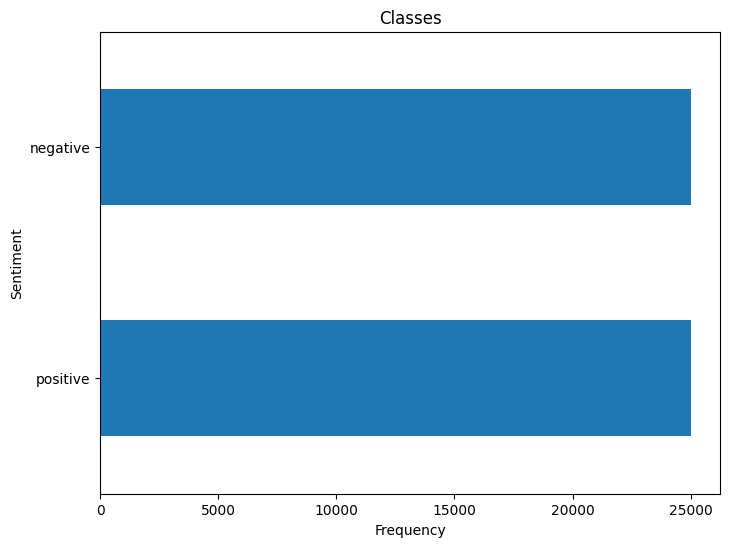

In [ ]:
ax = data['sentiment'].value_counts().plot(kind='barh',
                                    figsize=(8,6),
                                    title="Classes")
ax.set_ylabel("Sentiment")
ax.set_xlabel("Frequency")

In [ ]:
reviews = data['review'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

### Tokenización (tokenizer), truncamiento y padding

El proceso de tokenización, truncamiento y padding es una parte fundamental del preprocesamiento de texto en el campo del procesamiento del lenguaje natural (NLP), especialmente cuando se trabaja con modelos como LSTM para tareas como la clasificación de texto o el análisis de sentimientos. Aquí está una descripción detallada de cada paso:

1. **Tokenización**: El tokenizer es una herramienta que se utiliza para convertir el texto en secuencias de tokens o palabras. Cada palabra en el texto se asigna a un identificador único (índice) y se representa como un número entero. Esto es importante porque los modelos de aprendizaje automático, como los modelos LSTM, requieren que los datos de entrada sean numéricos.

2. **Truncamiento**: En el procesamiento de texto, es común que las secuencias de palabras tengan longitudes diferentes. Sin embargo, para alimentar los datos a un modelo LSTM, es necesario que todas las secuencias tengan la misma longitud. El truncamiento es el proceso de cortar o eliminar palabras de las secuencias más largas para que todas tengan la misma longitud.

   - **Truncamiento a la derecha (post-truncamiento)**: Se eliminan palabras de la parte final de las secuencias.
   - **Truncamiento a la izquierda (pre-truncamiento)**: Se eliminan palabras de la parte inicial de las secuencias.

3. **Padding**: Después del truncamiento, algunas secuencias pueden ser más cortas que otras y es necesario agregar tokens especiales llamados "tokens de relleno" (padding tokens) para igualar la longitud de todas las secuencias. Estos tokens de relleno generalmente tienen un valor de cero o se representan como vectores de ceros.

   - **Padding a la derecha (post-padding)**: Se agregan tokens de relleno al final de las secuencias.
   - **Padding a la izquierda (pre-padding)**: Se agregan tokens de relleno al inicio de las secuencias.

El proceso de tokenización, truncamiento y padding garantiza que todas las secuencias de palabras tengan la misma longitud, lo que facilita el procesamiento por parte de modelos de aprendizaje automático como LSTM. Esto es crucial para garantizar que los datos de entrada sean consistentes y compatibles con la arquitectura del modelo. Las bibliotecas de procesamiento de texto como TensorFlow y Keras en Python proporcionan herramientas y funciones para realizar estos pasos de manera eficiente.

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
len(train_sequences[0]), len(train_padded[0])

(87, 200)

In [ ]:
np.array(train_padded).max()

2999

In [ ]:
train_padded[0]

array([   1,   55,   79, 2075,  851,  312,  522, 1395,   58, 2808,    1,
        623,    1,  416,  851,  386,  651,  229,    1,  454, 1395,  807,
        905, 1218,  661,  404,   10,   79, 2075,  851,    1,    3, 1987,
          1, 2032, 1015,    1, 1338,    1,  389,  316,   55, 2021,  925,
         15,    1,    1,    1, 1300,    1,  105,   72,  383,  308,  357,
          1, 2394,   12,  143,   58,    1,    1,    4,  120, 1395,   79,
       2075,  851,   58, 1002,  851,  651,  229,   12,  429,  269, 1301,
          1,    1,    1,    1,    1,    1,    1, 1748,    1,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### Modelo

Este código en Python utiliza la biblioteca Keras para construir, compilar y resumir un modelo de red neuronal recurrente (RNN) con capas bidireccionales de LSTM para un problema de clasificación binaria.

Aquí está el detalle de cada parte del código:

1. **Inicialización del modelo**:
   ```python
   model = keras.Sequential([
       keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
       keras.layers.Bidirectional(keras.layers.LSTM(64)),
       keras.layers.Dense(24, activation='relu'),
       keras.layers.Dense(1, activation='sigmoid')
   ])
   ```
   - Se crea un modelo secuencial (`Sequential`) de Keras, que es una secuencia lineal de capas.
   - La primera capa es una capa de embedding (`Embedding`) que convierte las secuencias de números enteros (representación de las palabras) en vectores densos de longitud `embedding_dim`. El parámetro `vocab_size` especifica el tamaño del vocabulario y `input_length` especifica la longitud máxima de las secuencias de entrada.
   - Luego sigue una capa bidireccional de LSTM (`Bidirectional(LSTM(64))`) con 64 unidades LSTM en cada dirección.
   - Después de la capa LSTM, hay una capa densa (`Dense`) con 24 neuronas y activación ReLU.
   - Finalmente, hay una capa densa de salida (`Dense`) con una sola neurona y activación sigmoide, que produce una salida binaria para la clasificación.

2. **Compilación del modelo**:
   ```python
   model.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
   ```
   - Se compila el modelo especificando la función de pérdida (`loss`) como entropía cruzada binaria, el optimizador (`optimizer`) como Adam y la métrica (`metrics`) de evaluación como precisión (accuracy).

3. **Resumen del modelo**:
   ```python
   model.summary()
   ```
   - Se imprime un resumen del modelo que muestra la arquitectura de la red neuronal, incluyendo el tipo de capa, el número de parámetros entrenables y el tamaño de la salida en cada capa.

Binary Crossentropy es una función de pérdida comúnmente utilizada en problemas de clasificación binaria en el campo del aprendizaje automático y la inteligencia artificial. Esta función de pérdida se utiliza para evaluar la discrepancia entre las etiquetas verdaderas y las predicciones de un modelo en problemas donde se tienen dos clases mutuamente excluyentes (por ejemplo, positivo/negativo, sí/no, 1/0).

La fórmula matemática de la Binary Crossentropy es:

$$ \text{Binary Crossentropy} = -\frac{1}{N} \sum_{i=1}^{N} (y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)) $$

Donde:
- $ N $ es el número total de ejemplos en el conjunto de datos.
- $ y_i $ es la etiqueta verdadera del $ i $-ésimo ejemplo (1 para la clase positiva, 0 para la clase negativa).
- $ \hat{y}_i $ es la predicción del modelo para el $i$-ésimo ejemplo, que es una probabilidad entre 0 y 1 de que el ejemplo pertenezca a la clase positiva.

La Binary Crossentropy mide la diferencia entre las probabilidades predichas por el modelo ($\hat{y}_i $) y las etiquetas verdaderas ($ y_i $). Penaliza más fuertemente las discrepancias en las predicciones incorrectas, es decir, cuando el modelo predice una clase diferente a la etiqueta verdadera. Se optimiza minimizando esta función de pérdida durante el entrenamiento del modelo.

En resumen, la Binary Crossentropy es una medida de la discrepancia entre las probabilidades predichas por un modelo de clasificación binaria y las etiquetas verdaderas, y se utiliza como función de pérdida para entrenar el modelo y actualizar sus pesos durante el proceso de optimización.

Este código define un modelo de red neuronal recurrente bidireccional con capas LSTM para un problema de clasificación binaria, lo compila con una función de pérdida y un optimizador específicos, y muestra un resumen de su arquitectura.

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
 dense_6 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387601 (1.48 MB)
Trainable params: 387601 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)

Epoch 1/10
1055/1055 [==============================] - 287s 268ms/step - loss: 0.3887 - accuracy: 0.8250 - val_loss: 0.3064 - val_accuracy: 0.8680
Epoch 2/10
1055/1055 [==============================] - 263s 249ms/step - loss: 0.2755 - accuracy: 0.8906 - val_loss: 0.3474 - val_accuracy: 0.8605
Epoch 3/10
1055/1055 [==============================] - 262s 249ms/step - loss: 0.2421 - accuracy: 0.9045 - val_loss: 0.2889 - val_accuracy: 0.8848
Epoch 4/10
1055/1055 [==============================] - 265s 251ms/step - loss: 0.2126 - accuracy: 0.9168 - val_loss: 0.2847 - val_accuracy: 0.8717
Epoch 5/10
1055/1055 [==============================] - 262s 248ms/step - loss: 0.1797 - accuracy: 0.9310 - val_loss: 0.3336 - val_accuracy: 0.8696
Epoch 6/10
1055/1055 [==============================] - 265s 251ms/step - loss: 0.1551 - accuracy: 0.9428 - val_loss: 0.3280 - val_accuracy: 0.8760
Epoch 7/10
1055/1055 [==============================] - 266s 253ms/step - loss: 0.1267 - accuracy: 0.9560 - val_

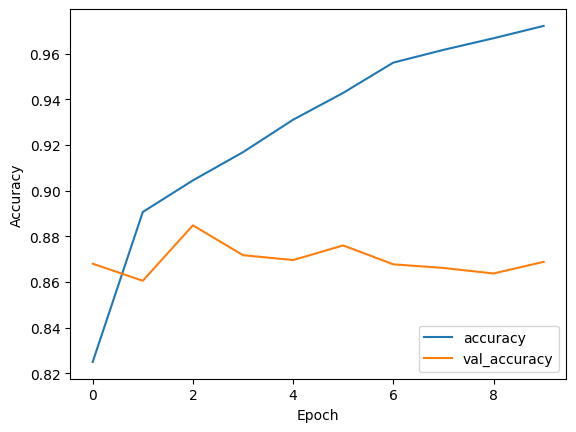

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))

391/391 [==============================] - 26s 63ms/step
Accuracy of prediction on test set :  0.8664


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6250
           1       0.86      0.87      0.87      6250

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



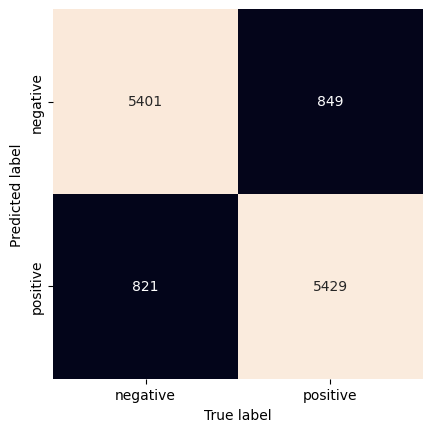

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels_classes = ["negative", "positive"]

cm = pd.DataFrame(confusion_matrix(test_labels, pred_labels, labels=[0, 1]),
                  columns=labels_classes,
                  index=labels_classes)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print(classification_report(test_labels, pred_labels))

### Un modelo más complejo

Este código en Python define un modelo de red neuronal recurrente (RNN) utilizando la biblioteca Keras para resolver un problema de clasificación binaria. Aquí está la descripción de cada parte del modelo:

1. **Capa de Embedding**:
   - `keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)`: Esta es la primera capa del modelo. Se utiliza para convertir las secuencias de números enteros (representación de palabras) en vectores densos de longitud `embedding_dim`. El parámetro `vocab_size` especifica el tamaño del vocabulario, `embedding_dim` especifica la dimensión de los vectores de embedding y `input_length` especifica la longitud máxima de las secuencias de entrada.

2. **Capa Bidireccional de LSTM**:
   - `keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))`: Esta es una capa bidireccional de LSTM (Long Short-Term Memory) con 64 unidades LSTM en cada dirección. La opción `return_sequences=True` indica que la capa devolverá secuencias en lugar de un único vector de salida.

3. **Capa Bidireccional de LSTM**:
   - `keras.layers.Bidirectional(keras.layers.LSTM(32))`: Otra capa bidireccional de LSTM con 32 unidades LSTM en cada dirección. Esta capa no especifica `return_sequences`, por lo que su salida será un único vector en lugar de secuencias.

4. **Capa Densa**:
   - `keras.layers.Dense(64, activation='relu')`: Una capa densa con 64 neuronas y función de activación ReLU. Esta capa realiza la extracción de características de las representaciones de las secuencias generadas por las capas LSTM.

5. **Capa de Dropout**:
   - `keras.layers.Dropout(0.5)`: Una capa de dropout que apaga aleatoriamente el 50% de las neuronas durante el entrenamiento para evitar el sobreajuste.

6. **Capa de Salida**:
   - `keras.layers.Dense(1, activation='sigmoid')`: Una capa densa de salida con una sola neurona y función de activación sigmoide. Esta capa produce una salida binaria que representa la probabilidad de pertenencia a la clase positiva en un problema de clasificación binaria.

Este modelo utiliza dos capas bidireccionales de LSTM para procesar secuencias de texto, seguidas de capas densas para la extracción de características y una capa de salida para la clasificación binaria. La capa de dropout se utiliza para regularizar el modelo y evitar el sobreajuste durante el entrenamiento.

### Dropout

Dropout es una técnica de regularización utilizada en redes neuronales para evitar el sobreajuste durante el entrenamiento. El sobreajuste ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos, lo que resulta en un rendimiento deficiente en datos de prueba o en situaciones del mundo real.

La idea detrás de Dropout es apagar aleatoriamente (eliminar temporalmente) un porcentaje de las neuronas durante cada paso de entrenamiento. Esto significa que las neuronas seleccionadas no contribuirán a la propagación hacia adelante ni a la retropropagación en esa iteración específica del entrenamiento. Como resultado, el modelo no puede depender demasiado de ninguna neurona específica o de una combinación particular de neuronas para realizar predicciones.

El efecto de Dropout es similar a entrenar una gran cantidad de redes neuronales más pequeñas y luego combinarlas en un solo modelo. Esto obliga a cada neurona a aprender características útiles de los datos de entrada de manera más independiente y robusta, lo que conduce a una representación más generalizable de los datos. Además, Dropout también ayuda a reducir la dependencia entre las neuronas, lo que hace que el modelo sea más resistente a los patrones de ruido en los datos.

En cuanto a la regularización, es un término más amplio que se refiere a técnicas utilizadas para prevenir el sobreajuste en modelos de aprendizaje automático. Dropout es una forma específica de regularización que se enfoca en las neuronas individuales en una red neuronal. Otras técnicas de regularización incluyen la penalización L1 y L2 (también conocida como regularización de peso), la eliminación de características, la reducción de dimensionalidad y la utilización de arquitecturas de modelo más simples.

Dropout es una técnica de regularización eficaz que ayuda a mejorar la generalización de los modelos de redes neuronales al prevenir el sobreajuste durante el entrenamiento. Se logra apagando aleatoriamente una fracción de las neuronas durante cada paso de entrenamiento, lo que fomenta una representación más robusta y generalizable de los datos.

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64,  return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200, 128)          84480     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
num_epochs = 10
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)

Epoch 1/10
1055/1055 [==============================] - 496s 462ms/step - loss: 0.5126 - accuracy: 0.7566 - val_loss: 0.4434 - val_accuracy: 0.7864
Epoch 2/10
1055/1055 [==============================] - 484s 458ms/step - loss: 0.3792 - accuracy: 0.8481 - val_loss: 0.2928 - val_accuracy: 0.8851
Epoch 3/10
1055/1055 [==============================] - 477s 453ms/step - loss: 0.3185 - accuracy: 0.8701 - val_loss: 0.2991 - val_accuracy: 0.8723
Epoch 4/10
1055/1055 [==============================] - 482s 457ms/step - loss: 0.2716 - accuracy: 0.8943 - val_loss: 0.2759 - val_accuracy: 0.8859
Epoch 5/10
1055/1055 [==============================] - 487s 462ms/step - loss: 0.2458 - accuracy: 0.9074 - val_loss: 0.2862 - val_accuracy: 0.8848
Epoch 6/10
1055/1055 [==============================] - 482s 457ms/step - loss: 0.2228 - accuracy: 0.9162 - val_loss: 0.3005 - val_accuracy: 0.8803
Epoch 7/10
1055/1055 [==============================] - 474s 450ms/step - loss: 0.2020 - accuracy: 0.9259 - val_

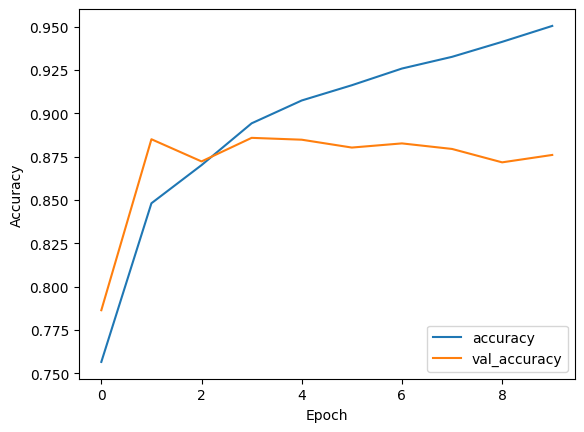

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

391/391 [==============================] - 43s 104ms/step
Accuracy of prediction on test set :  0.87168
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6250
           1       0.88      0.87      0.87      6250

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



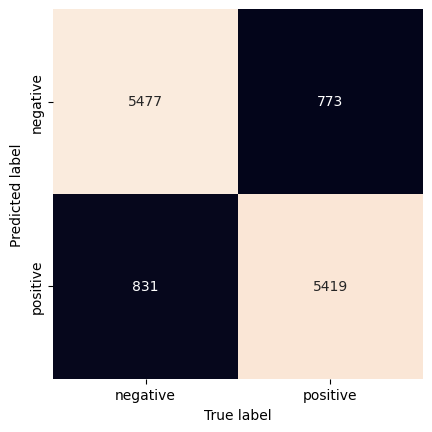

In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels, pred_labels))

labels_classes = ["negative", "positive"]

cm = pd.DataFrame(confusion_matrix(test_labels, pred_labels, labels=[0, 1]),
                  columns=labels_classes,
                  index=labels_classes)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print(classification_report(test_labels, pred_labels))

In [ ]:
# update and restart session
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.


### Transformers

Un modelo Transformer es una arquitectura de red neuronal desarrollada por Google que revolucionó el campo del procesamiento del lenguaje natural (NLP). A diferencia de las arquitecturas recurrentes tradicionales como LSTM y GRU, los modelos Transformer utilizan una arquitectura completamente basada en atención y no tienen componentes recurrentes, lo que les permite manejar de manera más efectiva las dependencias a largo plazo en secuencias de texto.

Aquí hay una descripción básica de cómo funciona un modelo Transformer:

1. **Capas de Codificador y Decodificador**: Un modelo Transformer consta de un codificador y un decodificador, cada uno compuesto por múltiples capas.

2. **Autoatención (Self-Attention)**: La autoatención es la piedra angular del modelo Transformer. Permite que el modelo procese las palabras en paralelo en lugar de secuencialmente, lo que lo hace más rápido y eficiente. En la autoatención, cada palabra en una secuencia interactúa con todas las demás palabras en la misma secuencia, y el modelo asigna pesos a estas interacciones para calcular una representación de atención ponderada para cada palabra.

3. **Capas de Feed-Forward**: Después de la autoatención, la representación de cada palabra pasa a través de una capa de feed-forward (totalmente conectada) para realizar transformaciones adicionales.

4. **Conexiones Residuales y Normalización por Capas**: Cada capa en un modelo Transformer tiene conexiones residuales y normalización por capas, lo que ayuda a mitigar el problema de desvanecimiento del gradiente durante el entrenamiento.

5. **Apilamiento de Capas**: Un modelo Transformer puede tener múltiples capas de codificador y decodificador apiladas una sobre otra. Esto permite que el modelo aprenda representaciones más complejas y de mayor nivel de abstracción.

El uso de un modelo Transformer para clasificación de texto implica entrenar el modelo con un gran corpus de texto etiquetado y luego utilizarlo para predecir las etiquetas de clasificación para nuevos textos. Durante el entrenamiento, el modelo ajusta sus parámetros para minimizar una función de pérdida que mide la discrepancia entre las etiquetas verdaderas y las predicciones del modelo. Una vez entrenado, el modelo puede realizar clasificaciones precisas en textos no vistos.

Algunas implementaciones populares de modelos Transformer incluyen BERT (Bidirectional Encoder Representations from Transformers), GPT (Generative Pre-trained Transformer) y T5 (Text-To-Text Transfer Transformer). Estos modelos se han utilizado con éxito en una amplia variedad de tareas de NLP, incluyendo clasificación de texto, traducción automática, generación de texto y más.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/transformer_image1.png" width="600">

### Un poco de atención

La atención de producto punto escalado (Scaled Dot-Product Attention) es un componente fundamental en los modelos Transformer utilizados en el procesamiento del lenguaje natural (NLP). Proporciona una forma de calcular la atención entre las diferentes partes de una secuencia de entrada de manera eficiente y efectiva. Aquí está una descripción de cómo funciona:

1. **Cálculo de la Atención**: Dada una consulta (query) $ Q $, una clave (key) $ K $, y un valor (value) $ V $, la atención de producto punto se calcula como el producto punto entre $ Q $ y $ K $, seguido de una operación de softmax para obtener los pesos de atención. Es decir, para una consulta $ q_i $ y una clave $ k_j $, la atención $ \alpha_{ij} $ se calcula como:

$$
\alpha_{ij} = \text{softmax} \left( \frac{{q_i \cdot k_j}}{\sqrt{d_k}} \right)
$$

Donde $ d_k $ es la dimensión de las consultas y las claves.

2. **Escalado**: Antes de calcular el producto punto, se escala el resultado dividiéndolo por la raíz cuadrada de la dimensión de las claves. Esto ayuda a estabilizar los gradientes durante el entrenamiento y controla la magnitud de los valores resultantes de la atención.

3. **Aplicación a los Valores**: Una vez que se calculan los pesos de atención, se aplican a los valores correspondientes para obtener la salida de la atención. Es decir, para una consulta $ q_i $, la salida $ o_i $ se calcula como la suma ponderada de los valores $ v_j $ con los pesos de atención correspondientes:

$$
o_i = \sum_j \alpha_{ij} \cdot v_j
$$

La atención de producto punto escalado permite al modelo aprender a enfocarse en partes específicas de la secuencia de entrada, dependiendo de la relevancia de las claves con respecto a las consultas. Esto hace que los modelos Transformer sean especialmente eficaces para tareas de procesamiento del lenguaje natural, donde la atención precisa y contextual es crucial para comprender y generar texto de manera efectiva.

La atención multi-cabeza (Multi-Head Attention) es una extensión de la atención de producto punto escalado utilizada en los modelos Transformer en el procesamiento del lenguaje natural (NLP). Permite que el modelo atienda simultáneamente a diferentes partes de la secuencia de entrada desde diferentes perspectivas, lo que ayuda a capturar relaciones complejas y a mejorar el rendimiento del modelo. Aquí está una descripción de cómo funciona:

1. **División de las Representaciones**: En lugar de calcular la atención con una sola cabeza (o perspectiva), la atención multi-cabeza divide la representación de las consultas, claves y valores en múltiples cabezas. Esto se hace mediante la proyección lineal de las representaciones originales en $ h $ conjuntos de representaciones más pequeñas, donde $ h $ es el número de cabezas.

2. **Atención Independiente**: Para cada cabeza, se calcula la atención de producto punto escalado independientemente. Es decir, para cada cabeza, se realizan los mismos pasos de cálculo de atención que en la atención de producto punto escalado, pero utilizando las representaciones proyectadas correspondientes.

3. **Concatenación y Proyección**: Después de calcular la atención para cada cabeza, las salidas de atención de todas las cabezas se concatenan y se proyectan linealmente nuevamente en el espacio de representación original. Esto permite que el modelo combine información de múltiples perspectivas en una representación integrada.

La atención multi-cabeza permite que el modelo aprenda a enfocarse en diferentes partes de la secuencia de entrada desde diferentes perspectivas, lo que puede ser útil para capturar relaciones complejas y modelar dependencias a diferentes escalas. Esto hace que los modelos Transformer sean especialmente eficaces para tareas de procesamiento del lenguaje natural, donde la comprensión contextual y la atención precisa son cruciales.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/transformer_image3.png" width="800">

In [ ]:
import keras
from keras import ops
from keras import layers

Este código implementa dos clases en Python utilizando la biblioteca Keras que se utilizan para construir y preprocesar datos para un modelo de Transformer. Aquí hay una descripción de cada clase:

1. **Clase `TransformerBlock`**:
   - Esta clase define un bloque individual en un modelo Transformer. Un bloque Transformer típico consiste en una capa de atención multi-cabeza seguida de una red neuronal feed-forward (FFN) y conexiones residuales con normalización por capas.
   - En el método `__init__`, se definen las capas que componen el bloque, incluyendo una capa de atención multi-cabeza (`layers.MultiHeadAttention`) y una capa FFN (`keras.Sequential`). También se definen capas de normalización por lotes (`layers.LayerNormalization`) y capas de dropout (`layers.Dropout`) para regularizar el modelo.
   - En el método `call`, se realiza la propagación hacia adelante a través del bloque. Primero, se aplica la capa de atención multi-cabeza a las entradas. Luego, se aplica dropout a la salida de la atención y se agrega a las entradas originales antes de aplicar la normalización por lotes. A continuación, se aplica la capa FFN a la salida de la normalización por lotes, seguida de dropout y una vez más, se agrega a la salida de la normalización por lotes.

2. **Clase `TokenAndPositionEmbedding`**:
   - Esta clase se utiliza para agregar vectores de embedding de tokens y posiciones a los datos de entrada. Los modelos Transformer no tienen una noción inherente de la posición de las palabras en una secuencia, por lo que se agrega un vector de posición a los embeddings de tokens para capturar esta información.
   - En el método `__init__`, se definen dos capas de embedding: una para los tokens (`layers.Embedding`) y otra para las posiciones (`layers.Embedding`). Estas capas se utilizan para mapear los índices de tokens y posiciones a vectores de embedding.
   - En el método `call`, se calculan los embeddings de tokens y posiciones y se suman para obtener la representación final de entrada. Los embeddings de posición se generan utilizando una capa de embedding de posiciones, mientras que los embeddings de tokens se obtienen utilizando una capa de embedding de tokens.

Además de estas clases, el código también carga y preprocesa datos utilizando el conjunto de datos IMDb. Carga las revisiones de películas IMDb y las etiquetas correspondientes, y luego las rellena y trunca para que todas tengan la misma longitud antes de utilizarlas para entrenar un modelo de Transformer.

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = ops.shape(x)[-1]
        positions = ops.arange(start=0, stop=maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.utils.pad_sequences(x_val, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
25000 Training sequences
25000 Validation sequences


Aquí está una descripción de cada parte del código a continuación:

1. **Parámetros del Modelo**:
   - `embed_dim = 32`: Tamaño de embedding para cada token.
   - `num_heads = 2`: Número de cabezas de atención.
   - `ff_dim = 32`: Tamaño de la capa oculta en la red feed forward dentro del Transformer.

2. **Definición de la Entrada**:
   - `inputs = layers.Input(shape=(maxlen,))`: Se define la capa de entrada del modelo con la forma `(maxlen,)`, donde `maxlen` es la longitud máxima de las secuencias de entrada.

3. **Capa de Embedding y de Transformer**:
   - `embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)`: Se crea la capa de embedding utilizando la clase `TokenAndPositionEmbedding`.
   - `x = embedding_layer(inputs)`: Se aplica la capa de embedding a las entradas.
   - `transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)`: Se crea un bloque Transformer utilizando la clase `TransformerBlock`.
   - `x = transformer_block(x)`: Se aplica el bloque Transformer a las salidas de la capa de embedding.

4. **Capa de Global Average Pooling**:
   - `x = layers.GlobalAveragePooling1D()(x)`: Se aplica una capa de pooling promedio global para reducir la dimensionalidad de las salidas del Transformer.

5. **Capas de Dropout y Densas**:
   - `x = layers.Dropout(0.1)(x)`: Se aplica dropout para regularizar las salidas del pooling promedio global.
   - `x = layers.Dense(20, activation="relu")(x)`: Se aplica una capa densa con activación ReLU.
   - `x = layers.Dropout(0.1)(x)`: Se aplica dropout adicional.
   - `outputs = layers.Dense(2, activation="softmax")(x)`: Se aplica una capa densa con activación softmax para producir las salidas del modelo. En este caso, el modelo está diseñado para clasificar textos en dos clases, por lo que la salida es un vector de probabilidad de longitud 2.

6. **Compilación del Modelo**:
   - `model = keras.Model(inputs=inputs, outputs=outputs)`: Se crea el modelo Keras especificando las entradas y salidas.

Este código define un modelo de clasificación de texto utilizando un Transformer en Keras, que consta de una capa de embedding, un bloque Transformer, capas de pooling, capas densas y capas de dropout para la regularización. El modelo está diseñado para clasificar textos en dos clases utilizando la función de activación softmax en la capa de salida.

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 154ms/step - accuracy: 0.7216 - loss: 0.5120 - val_accuracy: 0.8812 - val_loss: 0.2828
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 146ms/step - accuracy: 0.9310 - loss: 0.1872 - val_accuracy: 0.8676 - val_loss: 0.3153


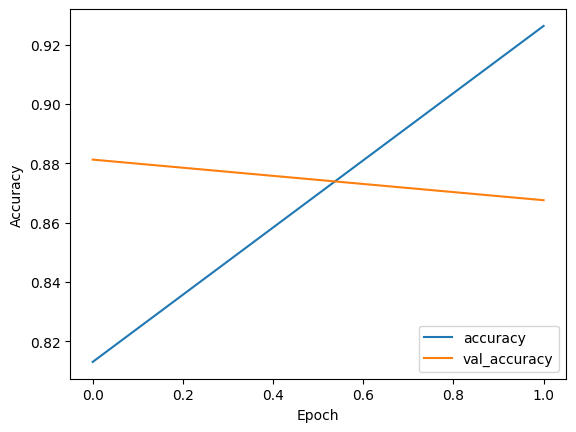

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
prediction = model.predict(x_val)

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step


In [ ]:
import numpy as np

prediction[0], np.argmax(prediction[0])

(array([0.6780869 , 0.32191303], dtype=float32), 0)

Accuracy of prediction on test set :  0.86756
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     12500
           1       0.84      0.92      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



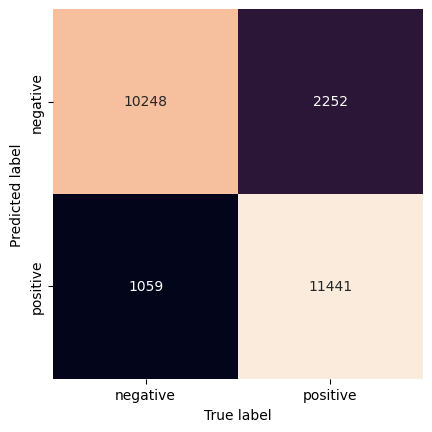

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for pred_i in prediction:
    pred_labels.append(np.argmax(pred_i))

print("Accuracy of prediction on test set : ", accuracy_score(y_val, pred_labels))

labels_classes = ["negative", "positive"]

cm = pd.DataFrame(confusion_matrix(y_val, pred_labels, labels=[0, 1]),
                  columns=labels_classes,
                  index=labels_classes)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

print(classification_report(y_val, pred_labels))

### Autoencoders

Un autoencoder es un tipo de red neuronal que se utiliza para aprender representaciones eficientes de datos de entrada, con el objetivo principal de reconstruir los datos de salida lo más fielmente posible. Funciona en dos etapas: la etapa de codificación (o compresión) y la etapa de decodificación (o reconstrucción). Aquí está una explicación detallada de cómo funciona:

1. **Etapa de Codificación**:
   - En esta etapa, la red neuronal toma los datos de entrada y los pasa a través de una serie de capas ocultas (generalmente capas densas o convolucionales) que reducen la dimensionalidad de los datos.
   - Las capas ocultas aprenden a extraer características importantes de los datos de entrada y a representarlos en un espacio de características de dimensionalidad menor, conocido como el espacio latente.
   - La última capa oculta de la etapa de codificación se llama el vector de características latentes, que contiene una representación comprimida de los datos de entrada.

2. **Etapa de Decodificación**:
   - En esta etapa, el vector de características latentes se pasa a través de otra serie de capas ocultas que intentan reconstruir los datos de entrada originales.
   - Estas capas ocultas generan una salida que tiene la misma forma que los datos de entrada originales, y el objetivo es que la salida se parezca lo más posible a los datos de entrada reales.
   - La última capa de la etapa de decodificación produce la salida reconstruida, que se compara con los datos de entrada originales durante el entrenamiento para ajustar los parámetros de la red y minimizar la pérdida de reconstrucción.

3. **Función de Pérdida**:
   - Durante el entrenamiento del autoencoder, se utiliza una función de pérdida que mide la discrepancia entre los datos de entrada originales y los datos de salida reconstruidos.
   - La función de pérdida más comúnmente utilizada para los autoencoders es el error cuadrático medio (MSE), que calcula la diferencia cuadrática entre los valores de píxeles de los datos de entrada y los valores de píxeles de los datos de salida reconstruidos.

4. **Aplicaciones**:
   - Los autoencoders se utilizan para diversas aplicaciones, como la reducción de dimensionalidad, la eliminación de ruido en imágenes, la generación de imágenes, la extracción de características y la detección de anomalías.

Un autoencoder es una red neuronal que aprende a comprimir y luego reconstruir los datos de entrada, capturando las características más importantes de los datos originales en un espacio de características de dimensionalidad menor. Esto permite la reducción de dimensionalidad y la generación de representaciones útiles para una variedad de aplicaciones de aprendizaje automático.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/autoencoder_schema.jpg" width="600">

### Arquitectura

La arquitectura de un autoencoder consta de un codificador que comprime los datos de entrada en un código latente y un decodificador que reconstruye los datos de entrada a partir de este código latente. Juntos, el codificador y el decodificador aprenden a representar y reconstruir eficientemente los datos de entrada, lo que permite la reducción de dimensionalidad y la generación de representaciones útiles para diversas aplicaciones.

Un autoencoder puede tener varias capas tanto en el codificador como en el decodificador. La profundidad de la arquitectura del autoencoder puede variar dependiendo de la complejidad de los datos y la tarea que se esté abordando. Aquí hay una descripción de cómo podrían ser varias capas en cada parte del autoencoder:

1. **Codificador (Encoder)**:
   - El codificador puede tener múltiples capas ocultas, donde cada capa extrae y aprende características de los datos de entrada a diferentes niveles de abstracción.
   - Estas capas pueden consistir en capas densas (fully connected), convolucionales o recurrentes, dependiendo del tipo de datos y la naturaleza de la tarea.
   - A medida que los datos de entrada pasan a través de cada capa del codificador, la dimensionalidad se reduce gradualmente, lo que resulta en una representación de los datos de entrada en un espacio de características de dimensionalidad más baja.

2. **Decodificador (Decoder)**:
   - El decodificador también puede tener múltiples capas ocultas, donde cada capa aumenta gradualmente la dimensionalidad de los datos del código latente hasta que coincida con la dimensionalidad de los datos de entrada originales.
   - Estas capas pueden ser similares a las del codificador, pero en sentido inverso. Por ejemplo, en lugar de capas convolucionales, pueden ser capas deconvolucionales (transposed convolutions) o capas de upsampling.
   - A medida que los datos del código latente pasan a través de cada capa del decodificador, se reconstruyen gradualmente los datos de entrada originales, utilizando la información contenida en el código latente.

La profundidad de las capas en el codificador y el decodificador puede variar según la complejidad de los datos y la capacidad del autoencoder para aprender representaciones útiles y reconstruir con precisión los datos de entrada. Una arquitectura más profunda puede capturar relaciones más complejas entre las características de los datos y generar representaciones más precisas, pero también puede aumentar la complejidad computacional y el riesgo de sobreajuste. Por lo tanto, el diseño de la arquitectura del autoencoder debe equilibrar la complejidad del modelo con el rendimiento y la generalización deseada.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/1_44eDEuZBEsmG.png" width="600">

### Autoencoders para detección de anomalías

El uso de autoencoders para la detección de anomalías es una técnica de aprendizaje no supervisado que se basa en la capacidad de los autoencoders para aprender y reconstruir patrones normales en los datos de entrada. Aquí hay un resumen del proceso:

1. **Entrenamiento del Autoencoder**:
   - Se entrena un autoencoder utilizando datos normales o no anómalos.
   - Durante el entrenamiento, el autoencoder aprende a comprimir y luego reconstruir los datos de entrada originales con la menor pérdida posible.
   - La función de pérdida utilizada durante el entrenamiento generalmente se basa en la diferencia entre los datos de entrada y los datos de salida reconstruidos, como el error cuadrático medio (MSE).

2. **Evaluación del Error de Reconstrucción**:
   - Una vez que el autoencoder está entrenado, se utiliza para reconstruir los datos de entrada.
   - Se calcula el error de reconstrucción para cada muestra de datos, que representa la discrepancia entre los datos de entrada originales y los datos de salida reconstruidos.
   - El error de reconstrucción puede ser calculado utilizando diversas métricas, como el MSE, la diferencia absoluta media (MAE) o alguna otra medida de distancia entre los datos originales y los datos reconstruidos.

3. **Detección de Anomalías**:
   - Las muestras con un alto error de reconstrucción se consideran anomalías o valores atípicos.
   - Si el error de reconstrucción de una muestra es significativamente mayor que el error promedio en el conjunto de datos de entrenamiento, se clasifica como una anomalía.
   - El umbral para definir qué tan grande debe ser el error de reconstrucción para clasificar una muestra como anómala puede ajustarse manualmente o mediante técnicas de validación cruzada.

4. **Aplicaciones**:
   - La detección de anomalías con autoencoders se utiliza en una variedad de campos, como la seguridad de redes, la detección de fraudes financieros, el monitoreo de la salud, el mantenimiento predictivo de maquinaria, entre otros.
   - Los autoencoders son especialmente útiles cuando se tienen datos no etiquetados o cuando las anomalías son difíciles de definir o son raras en comparación con los datos normales.

En resumen, los autoencoders pueden detectar anomalías al aprender a reconstruir datos normales y luego identificar muestras con un alto error de reconstrucción como anomalías potenciales. Esta técnica puede ser efectiva para identificar patrones anómalos en una variedad de conjuntos de datos no estructurados o semi-estructurados.

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=a8abbb1f21e56f4b38201cfd154f5b2b6d3f76ee64b3f927e19eb1fe68b24d1c
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [ ]:
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 25 # Number of features
X_train, X_test, y_train, y_test = generate_data(
   n_train=n_train, n_test=n_test,
   n_features=n_features,
   contamination=contamination,random_state=1234)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

In [ ]:
model = AutoEncoder(hidden_neurons =[25, 2, 2, 25])
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              52 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 25)                  │              75 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,733 (10.68 KB)

 Trainable params: 2,733 (10.68 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 87.0458 - val_loss: 70.3867
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.6538 - val_loss: 52.7862
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 49.6187 - val_loss: 43.8291
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.9889 - val_loss: 38.1159
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.6882 - val_loss: 34.3978
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 35.7181 - val_loss: 31.3997
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32.1487 - val_loss: 29.0643
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 30.6444 - val_loss: 26.9976
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 27.6644 - val_loss: 25.0470
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.8786 - val_loss: 23.3432
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.2740 - val_loss: 21.6498
Epoch 12/100
15/15 ━━━━━━━━━

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[25, 2, 2, 25],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7ed840b8edd0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


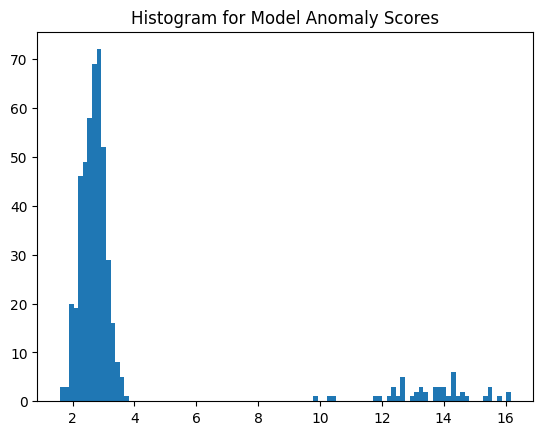

In [ ]:
# Get the outlier scores for the train data
y_train_scores = model.decision_scores_
# Predict the anomaly scores
y_test_scores = model.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')
plt.title("Histogram for Model Anomaly Scores")
plt.show()

In [ ]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score'] < 4, 0, 1)

Text(0.5, 1.0, 'Scatter plot with outliers')

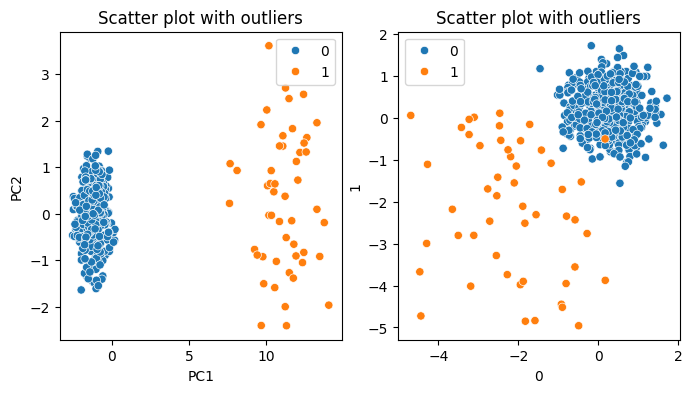

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(2)
pca.fit(X_train)
x_pca = pca.transform(X_test)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.scatterplot(x=x_pca.PC1, y=x_pca.PC2, hue=pd.Categorical(df_test['cluster']), alpha=1)
plt.title('Scatter plot with outliers')

plt.subplot(1,2,2)
sns.scatterplot(x=X_test[0], y=X_test[1], hue=pd.Categorical(df_test['cluster']), alpha=1)
plt.title('Scatter plot with outliers')

### Generative Adversarial Networks (GANs)

Las Generative Adversarial Networks (GANs), o Redes Generativas Adversarias en español, son un tipo de modelo de aprendizaje profundo que consta de dos redes neuronales: el generador y el discriminador. El propósito principal de una GAN es generar datos nuevos que sean similares a un conjunto de datos de entrenamiento dado.

Aquí hay una descripción de cómo funcionan las GANs:

1. **Generador (Generator)**:
   - El generador toma una entrada de ruido aleatorio, típicamente de una distribución de probabilidad conocida como la distribución latente, como una distribución gaussiana.
   - Utiliza esta entrada para generar datos nuevos que se parezcan a los datos de entrenamiento. Por ejemplo, si se entrena con imágenes de caras, el generador producirá imágenes de caras sintéticas.
   - El generador aprende a generar datos realistas a través del proceso de entrenamiento, donde ajusta sus parámetros para minimizar la capacidad del discriminador para distinguir entre datos reales y datos generados.

2. **Discriminador (Discriminator)**:
   - El discriminador es una red neuronal que toma como entrada tanto datos reales del conjunto de entrenamiento como datos generados por el generador.
   - Su objetivo es distinguir entre los datos reales y los generados, es decir, clasificar correctamente si los datos de entrada son "reales" o "falsos".
   - El discriminador se entrena utilizando datos reales y generados, ajustando sus parámetros para mejorar su capacidad para distinguir entre ellos.

3. **Proceso de Entrenamiento**:
   - Durante el entrenamiento, el generador y el discriminador se entrenan de manera adversarial, de ahí el nombre de las GANs.
   - El generador intenta engañar al discriminador generando datos que son tan realistas como sea posible, mientras que el discriminador intenta mejorar su capacidad para detectar datos generados.
   - Este proceso de entrenamiento adversarial continúa iterativamente hasta que el generador es capaz de generar datos que son indistinguibles de los datos reales para el discriminador.

4. **Aplicaciones**:
   - Las GANs se utilizan en una variedad de aplicaciones, como la generación de imágenes realistas, la síntesis de audio, la creación de texto y la generación de videos.
   - También se utilizan en tareas de mejoramiento de imágenes, como la super-resolución y la restauración de imágenes dañadas.
   - Además, las GANs se han utilizado en la creación de nuevas muestras de datos para tareas de clasificación, detección y segmentación en el campo del procesamiento de imágenes y el procesamiento de lenguaje natural.

En resumen, las GANs son una técnica poderosa para generar datos sintéticos realistas que son indistinguibles de los datos reales, y se utilizan en una amplia variedad de aplicaciones creativas y prácticas en el campo del aprendizaje profundo.

### Arquitectura

Una red generativa adversarial (GAN) tiene dos partes:

El generador aprende a generar datos plausibles. Las instancias generadas se convierten en ejemplos de entrenamiento negativos para el discriminador.

El discriminador aprende a distinguir los datos falsos del generador de los datos reales. El discriminador penaliza al generador por producir resultados implausibles.

Cuando comienza el entrenamiento, el generador produce datos obviamente falsos, y el discriminador aprende rápidamente a distinguir que son falsos:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/bad_gan.svg" width="600">

A medida que avanza el entrenamiento, el generador se acerca a producir resultados que pueden engañar al discriminador:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/ok_gan.svg" width="600">

Finalmente, si el entrenamiento del generador va bien, el discriminador empeora en distinguir entre lo real y lo falso. Comienza a clasificar datos falsos como reales, y su precisión disminuye.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/good_gan.svg" width="600">

Aquí hay una imagen de todo el sistema:

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/gan_diagram.svg" width="800">

Tanto el generador como el discriminador son redes neuronales. La salida del generador está conectada directamente a la entrada del discriminador. A través de la retropropagación, la clasificación del discriminador proporciona una señal que el generador utiliza para actualizar sus pesos.

### Discriminator

El discriminador en una GAN es simplemente un clasificador. Intenta distinguir entre datos reales y los datos creados por el generador. Puede usar cualquier arquitectura de red apropiada para el tipo de datos que está clasificando.


**Datos de Entrenamiento del Discriminador**

Los datos de entrenamiento del discriminador provienen de dos fuentes:

- **Instancias de datos reales**, como imágenes reales de personas. El discriminador usa estas instancias como ejemplos positivos durante el entrenamiento.
- **Instancias de datos falsos creados por el generador**. El discriminador usa estas instancias como ejemplos negativos durante el entrenamiento.

En la figura, las dos cajas "Muestra (Sample)" representan estas dos fuentes de datos que alimentan al discriminador. Durante el entrenamiento del discriminador, el generador no se entrena. Sus pesos permanecen constantes mientras produce ejemplos para que el discriminador se entrene.

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/gan_diagram_discriminator.svg" width="800">

**Entrenamiento del Discriminador**

El discriminador se conecta a dos funciones de pérdida. Durante el entrenamiento del discriminador, este ignora la pérdida del generador y solo utiliza la pérdida del discriminador. Utilizamos la pérdida del generador durante el entrenamiento del generador, como se describe en la siguiente sección.

**Durante el entrenamiento del discriminador**

1. El discriminador clasifica tanto datos reales como datos falsos generados por el generador.
2. La pérdida del discriminador penaliza al discriminador por clasificar incorrectamente una instancia real como falsa o una instancia falsa como real.
3. El discriminador actualiza sus pesos a través de la retropropagación desde la pérdida del discriminador a través de la red del discriminador.

### Generator

La parte del generador en una GAN aprende a crear datos falsos incorporando retroalimentación del discriminador. Aprende a hacer que el discriminador clasifique su salida como real.

El entrenamiento del generador requiere una integración más estrecha entre el generador y el discriminador que lo que requiere el entrenamiento del discriminador. La parte de la GAN que entrena al generador incluye:

- Entrada aleatoria
- Red del generador, que transforma la entrada aleatoria en una instancia de datos
- Red del discriminador, que clasifica los datos generados
- Salida del discriminador
- Pérdida del generador, que penaliza al generador por no engañar al discriminador

<img src="https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/gan_diagram_generator.svg" width="800">

**Entrada Aleatoria**

Las redes neuronales necesitan alguna forma de entrada. Normalmente ingresamos datos que queremos manipular, como una instancia que queremos clasificar o sobre la cual hacer una predicción. Pero ¿qué usamos como entrada para una red que genera instancias de datos completamente nuevas?

En su forma más básica, una GAN toma ruido aleatorio como su entrada. Luego, el generador transforma este ruido en una salida significativa. Al introducir ruido, podemos hacer que la GAN produzca una amplia variedad de datos, muestreando de diferentes lugares en la distribución objetivo.

Los experimentos sugieren que la distribución del ruido no importa mucho, por lo que podemos elegir algo fácil de muestrear, como una distribución uniforme. Por conveniencia, el espacio del cual se muestrea el ruido suele ser de menor dimensión que la dimensionalidad del espacio de salida.

Nota: Algunas GAN utilizan una entrada no aleatoria para dar forma a la salida. Consulte [Variaciones de GAN](https://developers.google.com/machine-learning/gan/applications).

**Uso del Discriminador para Entrenar al Generador**

Para entrenar una red neuronal, alteramos los pesos de la red para reducir el error o la pérdida de su salida. Sin embargo, en nuestra GAN, el generador no está directamente conectado a la pérdida que estamos tratando de afectar. El generador alimenta a la red del discriminador, y el discriminador produce la salida que estamos tratando de afectar. La pérdida del generador penaliza al generador por producir una muestra que la red del discriminador clasifica como falsa.

Este segmento adicional de la red debe incluirse en la retropropagación. La retropropagación ajusta cada peso en la dirección correcta al calcular el impacto del peso en la salida, es decir, cómo cambiaría la salida si cambiara el peso. Pero el impacto de un peso del generador depende del impacto de los pesos del discriminador en los que se alimenta. Por lo tanto, la retropropagación comienza en la salida y fluye hacia atrás a través del discriminador hacia el generador.

Al mismo tiempo, no queremos que el discriminador cambie durante el entrenamiento del generador. Intentar alcanzar un objetivo móvil haría que un problema difícil fuera aún más difícil para el generador.

Por lo tanto, entrenamos al generador con el siguiente procedimiento:

1. Muestreamos ruido aleatorio.
2. Producimos la salida del generador a partir del ruido aleatorio muestreado.
3. Obtenemos la clasificación del discriminador como "Real" o "Falso" para la salida del generador.
4. Calculamos la pérdida a partir de la clasificación del discriminador.
5. Retropropagamos a través tanto del discriminador como del generador para obtener los gradientes.
6. Utilizamos los gradientes para cambiar solo los pesos del generador.

Esta es una iteración del entrenamiento del generador. En la próxima sección veremos cómo equilibrar el entrenamiento tanto del generador como del discriminador.

### Entranmiento del GAN

Debido a que una GAN contiene dos redes entrenadas de forma separada, su algoritmo de entrenamiento debe abordar dos complicaciones:

1. Las GAN deben equilibrar dos tipos diferentes de entrenamiento (generador y discriminador).
2. La convergencia de las GAN es difícil de identificar.

Entrenamiento Alternante

El entrenamiento de una GAN procede en períodos alternantes:

1. El discriminador se entrena durante uno o más epochs.
2. El generador se entrena durante uno o más epochs.
3. Repetir los pasos 1 y 2 para continuar entrenando las redes del generador y del discriminador.

Mantenemos el generador constante durante la fase de entrenamiento del discriminador. A medida que el entrenamiento del discriminador intenta descifrar cómo distinguir entre datos reales y falsos, debe aprender a reconocer las fallas del generador. Este es un problema diferente para un generador completamente entrenado que para un generador no entrenado que produce una salida aleatoria.

De manera similar, mantenemos el discriminador constante durante la fase de entrenamiento del generador. De lo contrario, el generador estaría tratando de alcanzar un objetivo móvil y podría nunca converger.

Es este vaivén lo que permite a las GAN abordar problemas generativos que de otro modo serían intratables. Obtenemos un punto de apoyo en el difícil problema generativo al comenzar con un problema de clasificación mucho más simple. Por otro lado, si no puedes entrenar un clasificador para distinguir entre datos reales y generados incluso para la salida inicial aleatoria del generador, no puedes comenzar el entrenamiento de la GAN.

### Convergencia

A medida que el generador mejora con el entrenamiento, el rendimiento del discriminador empeora porque el discriminador no puede distinguir fácilmente entre real y falso. Si el generador tiene éxito perfectamente, entonces el discriminador tiene una precisión del 50%. En efecto, el discriminador lanza una moneda al aire para hacer su predicción.

Esta progresión plantea un problema para la convergencia de la GAN en su conjunto: la retroalimentación del discriminador se vuelve menos significativa con el tiempo. Si la GAN continúa entrenando más allá del punto en que el discriminador está dando retroalimentación completamente aleatoria, entonces el generador comienza a entrenar con retroalimentación basura, y su propia calidad puede colapsar.

Para una GAN, la convergencia a menudo es un estado fugaz, en lugar de estable.

### Función de pérdida (Loss)

Las GAN intentan replicar una distribución de probabilidad. Por lo tanto, deben usar funciones de pérdida que reflejen la distancia entre la distribución de los datos generados por la GAN y la distribución de los datos reales.

¿Cómo se captura la diferencia entre dos distribuciones en las funciones de pérdida de GAN? Esta pregunta es un área de investigación activa, y se han propuesto muchos enfoques. Aquí abordaremos dos funciones de pérdida comunes de GAN, ambas implementadas en TF-GAN:

1. Pérdida minimax: La función de pérdida utilizada en el artículo que introdujo las GAN.
2. Pérdida de Wasserstein: La función de pérdida predeterminada para los estimadores de TF-GAN. Descrito por primera vez en un artículo de 2017.

TF-GAN implementa muchas otras funciones de pérdida también.

**¿Una o dos funciones de pérdida?**

Una GAN puede tener dos funciones de pérdida: una para el entrenamiento del generador y otra para el entrenamiento del discriminador. ¿Cómo pueden dos funciones de pérdida trabajar juntas para reflejar una medida de distancia entre distribuciones de probabilidad?

En los esquemas de pérdida que veremos aquí, las pérdidas del generador y del discriminador se derivan de una sola medida de distancia entre distribuciones de probabilidad. En ambos esquemas, sin embargo, el generador solo puede afectar un término en la medida de distancia: el término que refleja la distribución de los datos falsos. Por lo tanto, durante el entrenamiento del generador, eliminamos el otro término, que refleja la distribución de los datos reales.

Las pérdidas del generador y del discriminador se ven diferentes al final, aunque se derivan de una sola fórmula.

**Pérdida Minimax**

En el artículo que introdujo las GAN, el generador intenta minimizar la siguiente función mientras que el discriminador intenta maximizarla:

En esta función:

- $D(x)$ es la estimación del discriminador de la probabilidad de que la instancia de datos reales x sea real.
- $Ex$ es el valor esperado sobre todas las instancias de datos reales.
- $G(z)$ es la salida del generador cuando se le da ruido z.
- $D(G(z))$ es la estimación del discriminador de la probabilidad de que una instancia falsa sea real.
- Ez es el valor esperado sobre todas las entradas aleatorias al generador (en efecto, el valor esperado sobre todas las instancias falsas generadas $G(z)$).

La fórmula se deriva de la entropía cruzada entre las distribuciones reales y generadas.

El generador no puede afectar directamente el término $log(D(x))$ en la función, por lo que, para el generador, minimizar la pérdida es equivalente a minimizar $log(1 - D(G(z)))$.

En TF-GAN, vea minimax_discriminator_loss y minimax_generator_loss para una implementación de esta función de pérdida.

**Pérdida Minimax Modificada**

El artículo original de GAN señala que la función de pérdida minimax anterior puede hacer que la GAN se quede atascada en las primeras etapas del entrenamiento de GAN cuando el trabajo del discriminador es muy fácil. Por lo tanto, el artículo sugiere modificar la pérdida del generador para que el generador intente maximizar $log D(G(z))$.

En TF-GAN, vea modified_generator_loss para una implementación de esta modificación.

**Pérdida de Wasserstein**

Por defecto, TF-GAN utiliza la pérdida de Wasserstein.

Esta función de pérdida depende de una modificación del esquema de GAN (llamado "Wasserstein GAN" o "WGAN") en el que el discriminador en realidad no clasifica las instancias. Para cada instancia, produce un número. Este número no tiene que ser menor que uno o mayor que cero, por lo que no podemos usar 0.5 como un umbral para decidir si una instancia es real o falsa. El entrenamiento del discriminador solo intenta hacer que la salida sea más grande para las instancias reales que para las falsas.

Dado que realmente no puede discriminar entre real y falso, al discriminador de WGAN se le llama "crítico" en lugar de "discriminador". Esta distinción tiene importancia teórica, pero para fines prácticos podemos tratarlo como un reconocimiento de que las entradas a las funciones de pérdida no tienen que ser probabilidades.

Las funciones de pérdida en sí son engañosamente simples:

Pérdida del Crítico: $D(x) - D(G(z))$

El discriminador intenta maximizar esta función. En otras palabras, intenta maximizar la diferencia entre su salida en instancias reales y su salida en instancias falsas.

Pérdida del Generador: $D(G(z))$

El generador intenta maximizar esta función. En otras palabras, intenta maximizar la salida del discriminador para sus instancias falsas.

En estas funciones:

- $D(x)$ es la salida del crítico para una instancia real.
- $G(z)$ es la salida del generador cuando se le da el ruido z.
- $D(G(z))$ es la salida del crítico para una instancia falsa.
- La salida del crítico D no tiene que estar entre 1 y 0.
- Las fórmulas se derivan de la distancia de transporte entre las distribuciones reales y generadas.

En TF-GAN, consulte wasserstein_generator_loss y wasserstein_discriminator_loss para implementaciones.

**Requisitos**

La justificación teórica para la GAN de Wasserstein (o WGAN) requiere que los pesos en toda la GAN se recorten para que permanezcan dentro de un rango limitado.

**Beneficios**

Las GAN de Wasserstein son menos propensas a quedarse atascadas que las GAN basadas en minimax, y evitan problemas con los gradientes que desaparecen. La distancia de transporte también tiene la ventaja de ser una métrica real: una medida de distancia en un espacio de distribuciones de probabilidad. La entropía cruzada no es una métrica en este sentido.

### GANs para data augmentation

Las GAN (Redes Generativas Adversarias) se pueden utilizar para la ampliación de datos o data augmentation de diversas maneras. Aquí hay algunos enfoques comunes:

1. **Generación de Datos Realistas:** La GAN puede generar datos sintéticos que se parezcan a los datos reales en el conjunto de datos original. Por ejemplo, si tienes un conjunto de imágenes de rostros humanos, una GAN puede generar nuevas imágenes de rostros humanos que sean casi indistinguibles de las imágenes reales. Estos datos generados pueden utilizarse para aumentar el tamaño del conjunto de datos original y mejorar la diversidad y representatividad de los datos.

2. **Aumento de la Variedad:** La GAN puede generar muestras que cubran partes del espacio de características que pueden estar subrepresentadas en el conjunto de datos original. Esto puede ayudar a mejorar la robustez y generalización del modelo entrenado con el conjunto de datos aumentado.

3. **Generación de Datos de Etiquetas Frías:** En problemas de clasificación con etiquetas frías o con un número limitado de ejemplos por clase, una GAN puede generar ejemplos adicionales para clases menos representadas. Esto ayuda a equilibrar la distribución de clases en el conjunto de datos, lo que puede mejorar el rendimiento del modelo en la clasificación de esas clases menos comunes.

4. **Aumento de Datos con Información Adicional:** Si se tienen características adicionales o metadatos junto con los datos originales, una GAN puede generar datos sintéticos que conserven estas características adicionales. Por ejemplo, si se tienen imágenes médicas junto con información sobre la edad y el sexo del paciente, una GAN puede generar nuevas imágenes médicas que estén vinculadas a combinaciones específicas de edad y sexo.

Las GAN pueden ser una herramienta poderosa para aumentar conjuntos de datos, mejorar la diversidad y la calidad de los datos, y ayudar a abordar problemas de desequilibrio de clases en el aprendizaje automático y la visión por computadora. Sin embargo, es importante tener en cuenta que el uso de datos generados debe hacerse con precaución y validarse cuidadosamente para garantizar que mejoren realmente el rendimiento del modelo en lugar de introducir sesgos o errores.

### Data augmentation para problemas desbalanceados

El data augmentation, o ampliación de datos, puede ser especialmente útil en problemas de clasificación desbalanceados, donde hay una diferencia significativa en la cantidad de muestras disponibles para cada clase. Aquí hay algunas formas en que el data augmentation puede abordar este problema:

1. **Generación de Muestras para Clases Minoritarias:** En problemas desbalanceados, las clases minoritarias pueden tener menos ejemplos de entrenamiento, lo que puede llevar a un rendimiento deficiente del modelo en estas clases. El data augmentation puede generar muestras sintéticas para las clases minoritarias, lo que aumenta su representación en el conjunto de datos. Esto ayuda a equilibrar la distribución de clases y mejora la capacidad del modelo para aprender de manera efectiva sobre las clases menos comunes.

2. **Aumento de la Variabilidad Intraclase:** Incluso en clases con un número suficiente de ejemplos, el data augmentation puede mejorar la variabilidad intraclase. Por ejemplo, en problemas de reconocimiento de objetos, se pueden aplicar transformaciones como rotaciones, traslaciones y cambios de escala a las imágenes de entrenamiento existentes para generar nuevas muestras. Esto ayuda al modelo a capturar mejor la variabilidad de los datos y a generalizar de manera más efectiva a nuevas instancias.

3. **Generación de Muestras con Etiquetas Frías:** Si el conjunto de datos desbalanceado también tiene etiquetas frías o clases poco representadas, el data augmentation puede generar ejemplos adicionales para estas clases. Esto puede mejorar la capacidad del modelo para clasificar correctamente las clases menos comunes.

4. **Aumento de la Diversidad de Muestras:** El data augmentation puede introducir una mayor diversidad de muestras en el conjunto de datos, lo que puede ayudar al modelo a capturar mejor las relaciones subyacentes entre las características y las etiquetas. Por ejemplo, en el procesamiento de texto, se pueden aplicar técnicas como la eliminación de palabras, la sustitución de sinónimos y la inserción de palabras para generar nuevas variantes de las muestras de texto existentes.

En general, el data augmentation puede mejorar significativamente el rendimiento de los modelos en problemas desbalanceados al aumentar la representación de clases minoritarias, aumentar la variabilidad de los datos y mejorar la capacidad del modelo para generalizar a nuevas instancias. Sin embargo, es importante tener en cuenta que el data augmentation debe aplicarse de manera cuidadosa y controlada para evitar la introducción de sesgos o distorsiones no deseadas en los datos.

### Balancear datos

Equilibrar los datos es importante en el aprendizaje automático por varias razones:

1. **Mejora el rendimiento del modelo:** En problemas de clasificación desbalanceados, donde una clase tiene muchas más muestras que otras, los modelos de aprendizaje automático pueden sesgarse hacia la clase mayoritaria y tener dificultades para clasificar correctamente las clases minoritarias. Al equilibrar los datos, el modelo puede aprender de manera más equitativa de todas las clases y, por lo tanto, mejorar su capacidad para clasificar con precisión todas las clases.

2. **Reducción del sesgo del modelo:** Los modelos de aprendizaje automático pueden aprender a predecir la clase mayoritaria con alta precisión, incluso si no es la clase de interés. Esto puede ocurrir si el modelo se entrena en un conjunto de datos desbalanceado. Al equilibrar los datos, se reduce el sesgo del modelo hacia la clase mayoritaria y se fomenta una clasificación más equitativa de todas las clases.

3. **Mejora la generalización:** Un modelo entrenado en un conjunto de datos desbalanceado puede tener dificultades para generalizar a datos no vistos, especialmente en las clases minoritarias. Al equilibrar los datos, se mejora la capacidad del modelo para generalizar a nuevas instancias y a clases subrepresentadas.

4. **Mitiga el impacto del sesgo en la evaluación del modelo:** Al evaluar el rendimiento del modelo en un conjunto de datos desbalanceado, las métricas de evaluación pueden verse sesgadas hacia la clase mayoritaria. Al equilibrar los datos, se mitiga este sesgo y se obtienen métricas de evaluación más equitativas y representativas del rendimiento del modelo en todas las clases.

En resumen, el equilibrio de los datos es importante para garantizar que los modelos de aprendizaje automático sean justos, precisos y generalizables en problemas de clasificación desbalanceados. Esto ayuda a evitar el sesgo del modelo y mejora su capacidad para realizar predicciones precisas en todas las clases del problema.

### Data augmentation para el dataset credit card fraud detection

El conjunto de datos de detección de fraudes en tarjetas de crédito es un conjunto de datos ampliamente utilizado en el campo de la detección de fraudes financieros. Contiene transacciones de tarjetas de crédito realizadas por titulares de tarjetas europeos durante un período de dos días en septiembre de 2013. El conjunto de datos está altamente desbalanceado, ya que solo el 0.172% de las transacciones son fraudes.

Aquí hay una descripción detallada del conjunto de datos:

- **Número de instancias:** El conjunto de datos consta de 284,807 transacciones de tarjetas de crédito. Cada transacción está representada por un conjunto de características y una etiqueta binaria que indica si la transacción es fraudulenta (1) o legítima (0).

- **Características:** Las características incluyen información básica de la transacción, como el monto de la transacción, el tiempo desde la primera transacción en segundos, y los componentes principales obtenidos mediante un análisis de componentes principales (PCA) para proteger la privacidad de los datos del cliente. Estas características PCA se derivan de las características originales, que no se proporcionan debido a problemas de privacidad y seguridad.

- **Variable de destino:** La variable de destino es binaria y representa si una transacción es fraudulenta (1) o legítima (0).

- **Desbalanceo de clases:** Como se mencionó anteriormente, el conjunto de datos está altamente desbalanceado, con una gran mayoría de transacciones legítimas y solo una pequeña fracción de transacciones fraudulentas.

- **Problema de aprendizaje:** El objetivo del conjunto de datos es predecir si una transacción de tarjeta de crédito es fraudulenta o legítima basándose en las características proporcionadas.

Este conjunto de datos es un desafío interesante para los modelos de detección de fraudes debido a su desbalance de clases y su gran cantidad de características. Los investigadores y profesionales del aprendizaje automático utilizan este conjunto de datos para desarrollar y probar algoritmos de detección de fraudes, así como para evaluar la efectividad de diferentes técnicas de manejo de datos desbalanceados.

- Descargar los datos: https://drive.google.com/file/d/1BvJZkuCmr11Ntu9SGh1UUgxnBAHb4QC8/view?usp=share_link

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = df.dropna()
df.shape

Mounted at /content/drive


(284807, 31)

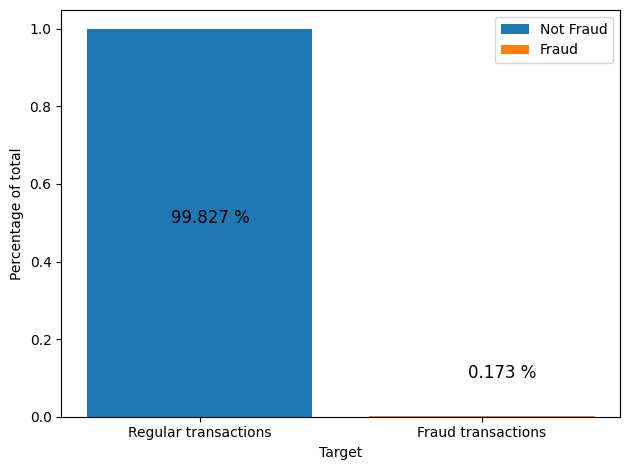

In [2]:
ratio_ones = df.Class.mean()
ratio_zeros = (len(df) - df.Class.sum())/len(df)

plt.bar('Regular transactions', height=ratio_zeros, label='Not Fraud')
plt.bar('Fraud transactions', height=ratio_ones, label='Fraud')
plt.xlabel("Target")
plt.ylabel('Percentage of total')
plt.text(-0.10, 0.5, "{0:.3f} %".format(ratio_zeros*100), fontsize=12)
plt.text(0.95, 0.1, "{0:.3f} %".format(ratio_ones*100), fontsize=12)
plt.legend()
plt.tight_layout()

- Vea: https://github.com/deeporigami/Portfolio/blob/6538fcaad1bf58c5f63d6320ca477fa867edb1df/GAN_FraudDetection_Medium_2.ipynb


In [3]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y)

train_df = pd.concat([X_train, y_train], axis=1)

In [ ]:
from keras.layers import Dense, Input
from keras.models import Sequential, Model
from keras.optimizers import Adam
import tensorflow.keras.backend as K

import tensorflow as tf

# Load the dataset (fraud and non-fraud data)
fraud_data = train_df[train_df['Class'] == 1].drop('Class', axis=1).values
non_fraud_data = train_df[train_df['Class'] == 0].drop('Class', axis=1).values

In [ ]:
np.unique(train_df['Class'], return_counts=True)

(array([0, 1]), array([227451,    394]))

In [ ]:
# Calculate the number of synthetic fraud samples to generate
num_real_fraud = len(fraud_data)
num_synthetic_samples = len(non_fraud_data) - num_real_fraud
print("# of non-fraud: ", len(non_fraud_data))
print("# of Real Fraud:", num_real_fraud)
print("# of Synthetic Fraud required:", num_synthetic_samples)

# of non-fraud:  227451
# of Real Fraud: 394
# of Synthetic Fraud required: 227057


In [ ]:
# Define the generator network
def build_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, input_shape=(latent_dim,)))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(output_dim, activation='sigmoid'))
    return model


# Define the discriminator network
def build_discriminator(input_dim):
    model = Sequential()
    model.add(Input((input_dim,)))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Dimensionality of the input noise for the generator
latent_dim = 512

# Build generator and discriminator models
generator = build_generator(latent_dim, fraud_data.shape[1])
discriminator = build_discriminator(fraud_data.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.metrics import Precision, Recall

# Compile the discriminator model
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy', metrics=[Precision(), Recall()])

In [ ]:
def generator_loss_log_d(y_true, y_pred):
    return -K.mean(K.log(y_pred + K.epsilon()))

# GAN model combining generator and discriminator
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss=generator_loss_log_d)

    return model

# Build and compile the GAN model
gan = build_gan(generator, discriminator)

In [ ]:
# Compile the discriminator model
from keras.metrics import Precision, Recall
discriminator.compile(optimizer=Adam(learning_rate=0.0002, beta_1=0.5), loss='binary_crossentropy',  metrics=[Precision(), Recall()])

In [ ]:
# Set hyperparameters
epochs = 10000
batch_size = 32

# Training loop for the GANs
for epoch in range(epochs):
    # Train discriminator (freeze generator)
    discriminator.trainable = True
    generator.trainable = False

    # Random sampling from the real fraud data
    real_fraud_samples = fraud_data[np.random.randint(0, num_real_fraud, batch_size)]

    # Generate fake fraud samples using the generator
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    fake_fraud_samples = generator.predict(noise)

    # Create labels for real and fake fraud samples
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train the discriminator on real and fake fraud samples
    d_loss_real = discriminator.train_on_batch(real_fraud_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_fraud_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator (freeze discriminator)
    discriminator.trainable = False
    generator.trainable = True

    # Generate synthetic fraud samples and create labels for training the generator
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))

    # Train the generator to generate samples that "fool" the discriminator
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print the progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} - D Loss: {d_loss} - G Loss: {g_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Epoch: 0 - D Loss: [1.3800555 0.        0.       ] - G Loss: 1.4951822757720947
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [ ]:
# After training, use the generator to create synthetic fraud data
noise = np.random.normal(0, 1, size=(num_synthetic_samples, latent_dim))
synthetic_fraud_data = generator.predict(noise)

In [ ]:
X_train.shape, synthetic_fraud_data.shape

In [ ]:
# Convert the result to a Pandas DataFrame format
fake_df = pd.DataFrame(synthetic_fraud_data, columns=df.drop(columns='Class').columns)
fake_df["Class"] = 1

- Desargar `fake_data_512.csv`: https://drive.google.com/file/d/1KZd9CPQxYZJN6hPG2mIZmpcaiV4TgppS/view?usp=share_link

In [8]:
fake_df = pd.read_csv("/content/drive/MyDrive/fake_data_512.csv")

# Now, combine the synthetic DataFrame with the train DataFrame to create the working dataframe
wdf = pd.concat([train_df, fake_df], axis=0)

# Resetting the index of the new DataFrame
wdf.reset_index(drop=True, inplace=True)

In [9]:
wdf.shape, train_df.shape

((454902, 31), (227845, 31))

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

X, y = train_df.drop(columns="Class"), train_df.Class

# Create a Random Forest Classifier with default parameters
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
clf.fit(X, y)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56863,     1],
       [   21,    77]])

In [11]:
# Trian with augmented data
X, y = wdf.drop(columns="Class"), wdf.Class

# Create a Random Forest Classifier with default parameters
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
clf.fit(X, y)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56862,     2],
       [   20,    78]])

### Transfer learning

El aprendizaje por transferencia (transfer learning en inglés) es una técnica de aprendizaje automático que aprovecha el conocimiento adquirido durante el entrenamiento de un modelo en un dominio fuente para mejorar el rendimiento en un dominio de destino relacionado pero diferente. En lugar de entrenar un modelo desde cero en un conjunto de datos específico, se utiliza un modelo previamente entrenado en un dominio similar como punto de partida y se ajustan sus parámetros para adaptarlo al nuevo problema.

El proceso de transferencia de conocimiento generalmente implica las siguientes etapas:

1. **Pre-entrenamiento en el dominio fuente:** Se entrena un modelo en un conjunto de datos grande y diverso relacionado con el problema de destino. Esto puede ser un conjunto de datos público o privado, y el modelo se entrena para resolver una tarea relacionada.

2. **Selección del modelo base:** Se elige un modelo pre-entrenado que sea relevante para el problema de destino. Estos modelos pueden ser arquitecturas de redes neuronales profundas como VGG, ResNet, Inception, etc., que se han entrenado en conjuntos de datos masivos como ImageNet.

3. **Ajuste fino en el dominio de destino:** Se adapta el modelo pre-entrenado al nuevo conjunto de datos de destino. Esto implica descongelar algunas capas del modelo y re-entrenarlas en el conjunto de datos de destino, mientras que otras capas pueden permanecer congeladas o tener una tasa de aprendizaje más baja.

4. **Evaluación y ajuste:** Se evalúa el rendimiento del modelo ajustado en el conjunto de datos de destino y se realizan ajustes adicionales si es necesario. Esto puede incluir la selección de hiperparámetros, la adición de capas adicionales, o la modificación de la arquitectura del modelo.

El aprendizaje por transferencia es especialmente útil cuando se tienen conjuntos de datos de destino pequeños o se carece de recursos computacionales para entrenar modelos desde cero. También puede ayudar a mejorar el rendimiento del modelo en dominios específicos donde se dispone de conjuntos de datos de referencia grandes y pre-entrenados. Esta técnica se utiliza ampliamente en áreas como el procesamiento de imágenes, el procesamiento de lenguaje natural y la visión por computadora.

- **Investigue:**
  - https://neptune.ai/blog/transfer-learning-guide-examples-for-images-and-text-in-keras
  
### Fuentes y recursos:
- Do you really need DL: https://www.sciencedirect.com/science/article/pii/S2667096822000891
- https://www.analyticsvidhya.com/blog/2022/01/sentiment-analysis-with-lstm/
- https://keras.io/examples/nlp/text_classification_with_transformer/
- https://neptune.ai/blog/anomaly-detection-in-time-series
- Attention is all you need: https://arxiv.org/pdf/1706.03762.pdf
- Autoencoders: https://www.jeremyjordan.me/autoencoders/
- GAN structure: https://developers.google.com/machine-learning/gan/gan_structure